In [83]:
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from numpy import random

In [84]:
# Importing data and finding averages

df2= pd.read_csv(r"C:\Users\rdh92\Downloads\DataImportLeeSolenoidTesting2.csv")
df_calc = df2.groupby('Time').mean().reset_index()
df_calc = df_calc.sort_values('ul', ascending=True)
df_calc

,Time,ul
0,22,2.0
1,44,4.3
2,52,6.1
3,60,9.1


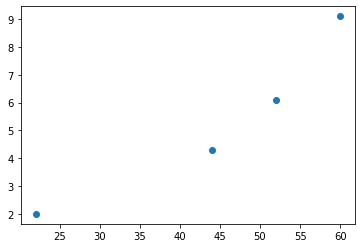

In [85]:
# Plotting Time vs ul

x, y = df_calc['Time'], df_calc['ul']
plt.scatter(x , y)

In [86]:
## Linear Fit Model Equation + Graph

def objective(x, a, b):
	return a * x + b
popt, _ = curve_fit(objective, x, y)
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

y = 0.17391 * x + -2.36401


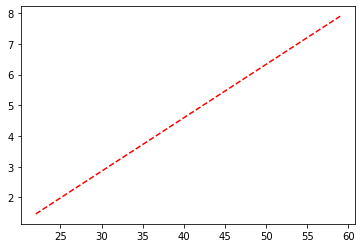

In [87]:
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '--', color='red')

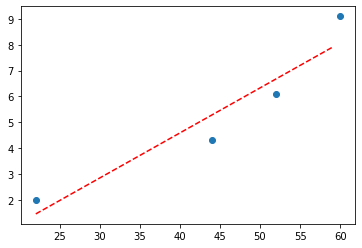

In [88]:
plt.plot(x_line, y_line, '--', color='red')
plt.scatter(x = 'Time', y = 'ul', data = df_calc)
plt.show()
## y = 0.17391 * x + -2.36401

In [89]:
## Equation and Graph for Second Order Polynomial Model - Time vs ul

def objective(x, a, b, c):
 return a * x + b * x**2 + c
popt, _ = curve_fit(objective, x, y)
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = -0.25582 * x + 0.00537 * x^2 + 5.04026


In [90]:
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a, b, c)

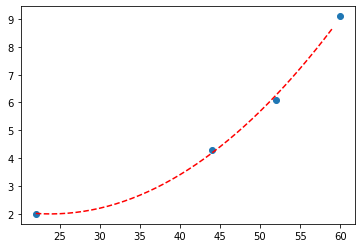

In [91]:
plt.plot(x_line, y_line, '--', color='red')
plt.scatter(x = 'Time', y = 'ul', data = df_calc)
plt.show()

In [92]:
def equation(x):
    y = (48.69091 * x) + (-10.90909 * x**2) + 22.05455
    return (y)

In [93]:
## Adding Ratios

ratios = [0, 0.33, 0.67, 1]
df_calc['Ratios'] = ratios


In [94]:
# Push Equation w/ Ratios

x, y = df_calc['Ratios'], df_calc['Time']

def objective(x, a, b, c):
 return a * x + b * x**2 + c
popt, _ = curve_fit(objective, x, y)
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = 68.16042 * x + -31.65988 * x^2 + 22.74973


In [95]:
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a, b, c)

In [96]:
df_calc

,Time,ul,Ratios
0,22,2.0,0.00
1,44,4.3,0.33
2,52,6.1,0.67
3,60,9.1,1.00


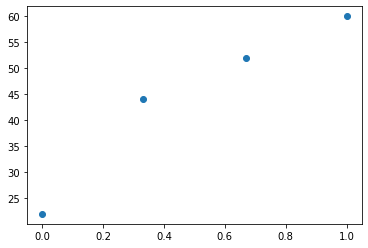

In [97]:
## Push Equation Graph

plt.plot(x_line, y_line, '--', color='red')
plt.scatter(x = 'Ratios', y = 'Time', data = df_calc)
plt.show()

In [98]:
## Inverse Equation - Pull Equation w/ Ratios

ratios = [1, 0.67, 0.33, 0]
df_calc['Ratios'] = ratios
df_calc

,Time,ul,Ratios
0,22,2.0,1.00
1,44,4.3,0.67
2,52,6.1,0.33
3,60,9.1,0.00


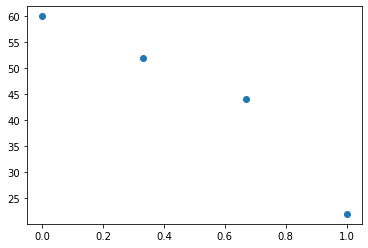

In [99]:
x, y = df_calc['Ratios'], df_calc['Time']
plt.scatter(df_calc['Ratios'], df_calc['Time'])

In [100]:
## Equation for inverse plot above - Pull Equation
def objective(x, a, b, c):
 return a * x + b * x**2 + c
popt, _ = curve_fit(objective, x, y)
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = -4.84065 * x + -31.65988 * x^2 + 59.25027


In [101]:
## Testing both Equations 

## For example if the ratio is 3 pushes : 4 pulls and the mouse does a pull we would use the first equation (y = 68.16042 * x + -31.65988 * x^2 + 22.74973)
## Ratio = 4 pushes to 4 pulls

def push_equation(x):
    y = 68.16042 * x + -31.65988 * x**2 + 22.74973
    return(y)
push_equation(float(4/4))

59.25027

In [102]:
## Now testing the push equation for a 1:1 ratio - ration is 3 pushes to 4 pulls and mouse does a push
def pull_equation(x):
    y = -4.84065 * x + -31.65988 * x**2 + 59.25027
    return(y)

pull_equation(1/1)

22.749740000000003

In [103]:
## Lets say that a mouse is doing a lot of pushes and then switches to a pull --> for the pushes he does 20 pushes with 3 pulls

push_equation(3/20)

32.261445699999996

In [104]:
### The the mouse decides to throw a pull into the mix --> 20 pushes with 4 pulls

pull_equation(4/20)

57.0157448

In [105]:
### And then another pull --> 20 pushes 5 pulls

pull_equation(5/20)

## something is wrong here, the number should be going up

56.061365

In [106]:
## Lets say now it does a push --> 21 pushes 5 pulls

push_equation(5/21)

37.18362365079365

New Equation me and Ian Discussed

In [107]:
df_calc

,Time,ul,Ratios
0,22,2.0,1.00
1,44,4.3,0.67
2,52,6.1,0.33
3,60,9.1,0.00


In [108]:
## Set alpha = 3
## beta = 2 (minimum amount of water for solenoid open time)

## Solenoid open time = alpha * (1-((F-R)/(F+R))) + beta

def function(alpha, beta, F, R):
    open_time = alpha * (1-((F-R)/(F+R))) + beta
    return(open_time)

#TODO Make this model a non-linear model instead of linear one

In [109]:
function(4, 22, 10, 10)
#TODO This should equal to 22 but it is not for some reason, need to investigate why

26.0

In [110]:
# F/R 

ratios = [0, 1, 0.67, 1]
df_calc['Ratios'] = ratios